# Spectral Ananlysis

## 1. Import Libraries 

In [22]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl

In [21]:
from sklearn.cluster import SpectralClustering
from spectral import SpectralClusteringg

ModuleNotFoundError: No module named 'spectral'

## 2. Create Dataset

In [25]:
df = pd.read_csv('dataset/28_1800.csv')
table=df.pivot_table(index=["Name"])
table=table.reset_index()
# features order:
# 0.Name, 1.AirTemp., 2.Alt, 3.DewPoint, 4.Lat, 5.Longt, 6.Pres., 7.R.Humidity, 8.Visib., 9.WindDir., 10.WindGust, 11.WindSpeed

# change the order of features
table2=table.iloc[:,[1,2,3,6,7,8,9,10,11,0,4,5]]
#print(table2.tail())
# specific features - new table is created
# enter the fourth column to address feature e.g: 1. AirTemp, 7. Relative Humidity
# e.g: table3=table.iloc[:,[0,4,5,1]]
table3=table.iloc[:,[0,4,5,7]]
table3=table3.dropna()

# for debug print tail of table3
#print(table3.tail())
#table3
title="RelativeHumidity"


# k=clustering number
k=4
cluster=KMeans(n_clusters=k)
table3["Cluster"]=cluster.fit_predict(table3[table3.columns[3:]])
#table3

# centroids = clusters' center points
centroids = cluster.cluster_centers_
weather_clusters=table3[["Name","Lat","Longt","Cluster",title]]
#print(weather_clusters)
weather_clusters.to_csv('ClusteredData.csv', index=False)


# informative
#print("centroids")
#print(table3.columns)
#print(centroids)

Cluster0 Size: 2728 , Cluster1 Size: 1976 , Cluster2 Size: 3 , Cluster3 Size: 2537
max_c0: 35.5  min_c0: 0.0 Color:R
max_c1: 148.2  min_c1: 67.5 Color:G
max_c2: 655.0  min_c2: 655.0 Color:B
max_c3: 67.4  min_c3: 35.666666666666664 Color:Y


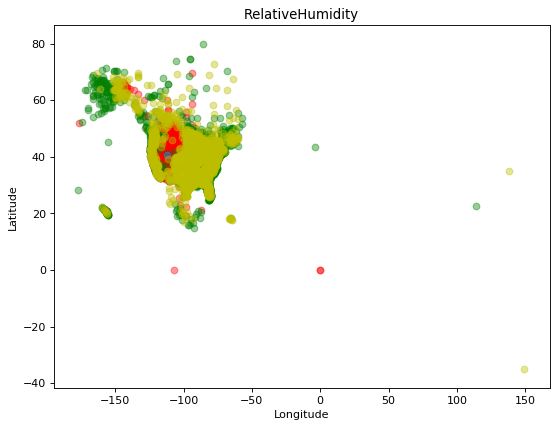

In [15]:
# plotting clusters
plt.figure(num=None, figsize=(8, 6), dpi=80)
if k==2:
    x_0=weather_clusters[weather_clusters.Cluster==0]["Longt"]
    y_0=weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1=pl.scatter(x_0,y_0,c='r',marker='o',alpha=0.4)
    x_1=weather_clusters[weather_clusters.Cluster==1]["Longt"]
    y_1=weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2=pl.scatter(x_1,y_1,c='g',marker='o',alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:",len(x_0), ", Cluster1 Size:",len(x_1))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")

elif k==3:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    # for sensor fault visibility in figure
    # c2 = pl.scatter(x_1, y_1, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    x_2=weather_clusters[weather_clusters.Cluster==2]["Longt"]
    y_2=weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    #c3 = pl.scatter(x_2, y_2, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    c3=pl.scatter(x_2,y_2,c='b',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
elif k==4:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    #c2 = pl.scatter(x_1, y_1, c='g', marker='x', alpha=0.8, s=169, linewidths=3, zorder=10)
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    x_2 = weather_clusters[weather_clusters.Cluster == 2]["Longt"]
    y_2 = weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    c3 = pl.scatter(x_2, y_2, c='b', marker='o', alpha=0.4)
    x_3=weather_clusters[weather_clusters.Cluster==3]["Longt"]
    y_3=weather_clusters[weather_clusters.Cluster == 3]["Lat"]
    c3=pl.scatter(x_3,y_3,c='y',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2), ", Cluster3 Size:", len(x_3))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
    max_c3 = max(weather_clusters[weather_clusters.Cluster == 3][title])
    min_c3 = min(weather_clusters[weather_clusters.Cluster == 3][title])
    print("max_c3:", max_c3, " min_c3:", min_c3, "Color:Y")

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title(title)
pl.savefig("plot_output.png")
pl.show()

## 3. Graph Laplacian

In [27]:
df = pd.read_csv('dataset/28_1800.csv')
table=df.pivot_table(index=["Name"])
table=table.reset_index()
# features order:
# 0.Name, 1.AirTemp., 2.Alt, 3.DewPoint, 4.Lat, 5.Longt, 6.Pres., 7.R.Humidity, 8.Visib., 9.WindDir., 10.WindGust, 11.WindSpeed

# change the order of features
table2=table.iloc[:,[1,2,3,6,7,8,9,10,11,0,4,5]]
#print(table2.tail())
# specific features - new table is created
# enter the fourth column to address feature e.g: 1. AirTemp, 7. Relative Humidity
# e.g: table3=table.iloc[:,[0,4,5,1]]
table3=table.iloc[:,[0,4,5,7]]
table3=table3.dropna()

# for debug print tail of table3
#print(table3.tail())
#table3
title="RelativeHumidity"


# k=clustering number
k=4
#cluster=KMeans(n_clusters=k)
cluster=SpectralClusteringg(n_clusters=k,assign_labels="discretize",random_state=0)
#table3["Cluster"]=cluster.fit_predict(table3[table3.columns[3:]])
#table3
cluster.fit(table3[table3.columns[3:]])
table3["Cluster"]=cluster._labels


# centroids = clusters' center points
##centroids = cluster.cluster_centers_
weather_clusters=table3[["Name","Lat","Longt","Cluster",title]]
#print(weather_clusters)
weather_clusters.to_csv('ClusteredData.csv', index=False)


# informative
#print("centroids")
#print(table3.columns)
#print(centroids)

AttributeError: 'SpectralClusteringg' object has no attribute '_validate_data'

Cluster0 Size: 2678 , Cluster1 Size: 2846 , Cluster2 Size: 3 , Cluster3 Size: 1717
max_c0: 34.5  min_c0: 0.0 Color:R
max_c1: 148.2  min_c1: 34.666666666666664 Color:G
max_c2: 655.0  min_c2: 655.0 Color:B
max_c3: 100.0  min_c3: 70.75 Color:Y


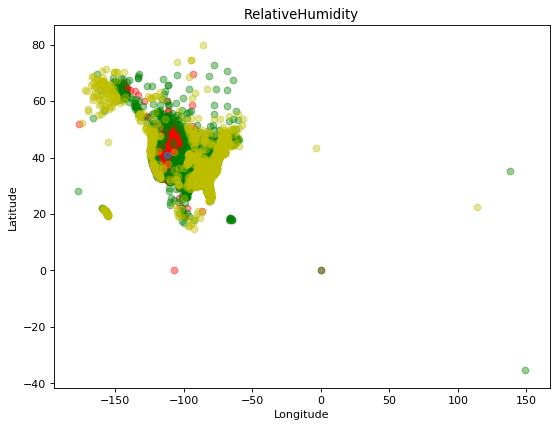

In [20]:
# plotting clusters
plt.figure(num=None, figsize=(8, 6), dpi=80)
if k==2:
    x_0=weather_clusters[weather_clusters.Cluster==0]["Longt"]
    y_0=weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1=pl.scatter(x_0,y_0,c='r',marker='o',alpha=0.4)
    x_1=weather_clusters[weather_clusters.Cluster==1]["Longt"]
    y_1=weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2=pl.scatter(x_1,y_1,c='g',marker='o',alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:",len(x_0), ", Cluster1 Size:",len(x_1))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")

elif k==3:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    # for sensor fault visibility in figure
    # c2 = pl.scatter(x_1, y_1, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    x_2=weather_clusters[weather_clusters.Cluster==2]["Longt"]
    y_2=weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    #c3 = pl.scatter(x_2, y_2, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    c3=pl.scatter(x_2,y_2,c='b',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
elif k==4:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    #c2 = pl.scatter(x_1, y_1, c='g', marker='x', alpha=0.8, s=169, linewidths=3, zorder=10)
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    x_2 = weather_clusters[weather_clusters.Cluster == 2]["Longt"]
    y_2 = weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    c3 = pl.scatter(x_2, y_2, c='b', marker='o', alpha=0.4)
    x_3=weather_clusters[weather_clusters.Cluster==3]["Longt"]
    y_3=weather_clusters[weather_clusters.Cluster == 3]["Lat"]
    c3=pl.scatter(x_3,y_3,c='y',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2), ", Cluster3 Size:", len(x_3))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
    max_c3 = max(weather_clusters[weather_clusters.Cluster == 3][title])
    min_c3 = min(weather_clusters[weather_clusters.Cluster == 3][title])
    print("max_c3:", max_c3, " min_c3:", min_c3, "Color:Y")

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title(title)
pl.savefig("plot_output.png")
pl.show()

## 4. Clustering

In [24]:
class SpectralClusteringg():#ClusterMixin, BaseEstimator):
    """Apply clustering to a projection of the normalized Laplacian.
    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance when clusters are
    nested circles on the 2D plane.
    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.
    When calling ``fit``, an affinity matrix is constructed using either
    kernel function such the Gaussian (aka RBF) kernel of the euclidean
    distanced ``d(X, X)``::
            np.exp(-gamma * d(X,X) ** 2)
    or a k-nearest neighbors connectivity matrix.
    Alternatively, using ``precomputed``, a user-provided affinity
    matrix can be used.
    Read more in the :ref:`User Guide <spectral_clustering>`.
    Parameters
    ----------
    n_clusters : int, default=8
        The dimension of the projection subspace.
    eigen_solver : {'arpack', 'lobpcg', 'amg'}, default=None
        The eigenvalue decomposition strategy to use. AMG requires pyamg
        to be installed. It can be faster on very large, sparse problems,
        but may also lead to instabilities. If None, then ``'arpack'`` is
        used.
    n_components : int, default=n_clusters
        Number of eigen vectors to use for the spectral embedding
    random_state : int, RandomState instance, default=None
        A pseudo random number generator used for the initialization of the
        lobpcg eigen vectors decomposition when ``eigen_solver='amg'`` and by
        the K-Means initialization. Use an int to make the randomness
        deterministic.
        See :term:`Glossary <random_state>`.
    n_init : int, default=10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    gamma : float, default=1.0
        Kernel coefficient for rbf, poly, sigmoid, laplacian and chi2 kernels.
        Ignored for ``affinity='nearest_neighbors'``.
    affinity : str or callable, default='rbf'
        How to construct the affinity matrix.
         - 'nearest_neighbors' : construct the affinity matrix by computing a
           graph of nearest neighbors.
         - 'rbf' : construct the affinity matrix using a radial basis function
           (RBF) kernel.
         - 'precomputed' : interpret ``X`` as a precomputed affinity matrix.
         - 'precomputed_nearest_neighbors' : interpret ``X`` as a sparse graph
           of precomputed nearest neighbors, and constructs the affinity matrix
           by selecting the ``n_neighbors`` nearest neighbors.
         - one of the kernels supported by
           :func:`~sklearn.metrics.pairwise_kernels`.
        Only kernels that produce similarity scores (non-negative values that
        increase with similarity) should be used. This property is not checked
        by the clustering algorithm.
    n_neighbors : int, default=10
        Number of neighbors to use when constructing the affinity matrix using
        the nearest neighbors method. Ignored for ``affinity='rbf'``.
    eigen_tol : float, default=0.0
        Stopping criterion for eigendecomposition of the Laplacian matrix
        when ``eigen_solver='arpack'``.
    assign_labels : {'kmeans', 'discretize'}, default='kmeans'
        The strategy to use to assign labels in the embedding
        space. There are two ways to assign labels after the laplacian
        embedding. k-means can be applied and is a popular choice. But it can
        also be sensitive to initialization. Discretization is another approach
        which is less sensitive to random initialization.
    degree : float, default=3
        Degree of the polynomial kernel. Ignored by other kernels.
    coef0 : float, default=1
        Zero coefficient for polynomial and sigmoid kernels.
        Ignored by other kernels.
    kernel_params : dict of str to any, default=None
        Parameters (keyword arguments) and values for kernel passed as
        callable object. Ignored by other kernels.
    n_jobs : int, default=None
        The number of parallel jobs to run when `affinity='nearest_neighbors'`
        or `affinity='precomputed_nearest_neighbors'`. The neighbors search
        will be done in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    verbose : bool, default=False
        Verbosity mode.
        .. versionadded:: 0.24
    Attributes
    ----------
    affinity_matrix_ : array-like of shape (n_samples, n_samples)
        Affinity matrix used for clustering. Available only if after calling
        ``fit``.
    labels_ : ndarray of shape (n_samples,)
        Labels of each point
    Examples
    --------
    >>> from sklearn.cluster import SpectralClustering
    >>> import numpy as np
    >>> X = np.array([[1, 1], [2, 1], [1, 0],
    ...               [4, 7], [3, 5], [3, 6]])
    >>> clustering = SpectralClustering(n_clusters=2,
    ...         assign_labels="discretize",
    ...         random_state=0).fit(X)
    >>> clustering.labels_
    array([1, 1, 1, 0, 0, 0])
    >>> clustering
    SpectralClustering(assign_labels='discretize', n_clusters=2,
        random_state=0)
    Notes
    -----
    If you have an affinity matrix, such as a distance matrix,
    for which 0 means identical elements, and high values means
    very dissimilar elements, it can be transformed in a
    similarity matrix that is well suited for the algorithm by
    applying the Gaussian (RBF, heat) kernel::
        np.exp(- dist_matrix ** 2 / (2. * delta ** 2))
    Where ``delta`` is a free parameter representing the width of the Gaussian
    kernel.
    Another alternative is to take a symmetric version of the k
    nearest neighbors connectivity matrix of the points.
    If the pyamg package is installed, it is used: this greatly
    speeds up computation.
    References
    ----------
    - Normalized cuts and image segmentation, 2000
      Jianbo Shi, Jitendra Malik
      http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.160.2324
    - A Tutorial on Spectral Clustering, 2007
      Ulrike von Luxburg
      http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    """
    #@_deprecate_positional_args
    def __init__(self, n_clusters=8, *, eigen_solver=None, n_components=None,
                 random_state=None, n_init=10, gamma=1., affinity='rbf',
                 n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans',
                 degree=3, coef0=1, kernel_params=None, n_jobs=None,
                 verbose=False):
        self.n_clusters = n_clusters
        self.eigen_solver = eigen_solver
        self.n_components = n_components
        self.random_state = random_state
        self.n_init = n_init
        self.gamma = gamma
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        self.eigen_tol = eigen_tol
        self.assign_labels = assign_labels
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.n_jobs = n_jobs
        self.verbose = verbose

    def fit(self, X, y=None):
        """Perform spectral clustering from features, or affinity matrix.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features), or \
                array-like of shape (n_samples, n_samples)
            Training instances to cluster, or similarities / affinities between
            instances if ``affinity='precomputed'``. If a sparse matrix is
            provided in a format other than ``csr_matrix``, ``csc_matrix``,
            or ``coo_matrix``, it will be converted into a sparse
            ``csr_matrix``.
        y : Ignored
            Not used, present here for API consistency by convention.
        Returns
        -------
        self
        """
        X = self._validate_data(X, accept_sparse=['csr', 'csc', 'coo'],
                                dtype=np.float64, ensure_min_samples=2)
        allow_squared = self.affinity in ["precomputed",
                                          "precomputed_nearest_neighbors"]
        if X.shape[0] == X.shape[1] and not allow_squared:
            warnings.warn("The spectral clustering API has changed. ``fit``"
                          "now constructs an affinity matrix from data. To use"
                          " a custom affinity matrix, "
                          "set ``affinity=precomputed``.")

        if self.affinity == 'nearest_neighbors':
            connectivity = kneighbors_graph(X, n_neighbors=self.n_neighbors,
                                            include_self=True,
                                            n_jobs=self.n_jobs)
            self.affinity_matrix_ = 0.5 * (connectivity + connectivity.T)
        elif self.affinity == 'precomputed_nearest_neighbors':
            estimator = NearestNeighbors(n_neighbors=self.n_neighbors,
                                         n_jobs=self.n_jobs,
                                         metric="precomputed").fit(X)
            connectivity = estimator.kneighbors_graph(X=X, mode='connectivity')
            self.affinity_matrix_ = 0.5 * (connectivity + connectivity.T)
        elif self.affinity == 'precomputed':
            self.affinity_matrix_ = X
        else:
            params = self.kernel_params
            if params is None:
                params = {}
            if not callable(self.affinity):
                params['gamma'] = self.gamma
                params['degree'] = self.degree
                params['coef0'] = self.coef0
            self.affinity_matrix_ = pairwise_kernels(X, metric=self.affinity,
                                                     filter_params=True,
                                                     **params)

        random_state = check_random_state(self.random_state)
        self.labels_ = spectral_clustering(self.affinity_matrix_,
                                           n_clusters=self.n_clusters,
                                           n_components=self.n_components,
                                           eigen_solver=self.eigen_solver,
                                           random_state=random_state,
                                           n_init=self.n_init,
                                           eigen_tol=self.eigen_tol,
                                           assign_labels=self.assign_labels,
                                           verbose=self.verbose)
        return self


In [23]:
#@_deprecate_positional_args
def discretize(vectors, *, copy=True, max_svd_restarts=30, n_iter_max=20,
               random_state=None):
    """Search for a partition matrix (clustering) which is closest to the
    eigenvector embedding.
    Parameters
    ----------
    vectors : array-like of shape (n_samples, n_clusters)
        The embedding space of the samples.
    copy : bool, default=True
        Whether to copy vectors, or perform in-place normalization.
    max_svd_restarts : int, default=30
        Maximum number of attempts to restart SVD if convergence fails
    n_iter_max : int, default=30
        Maximum number of iterations to attempt in rotation and partition
        matrix search if machine precision convergence is not reached
    random_state : int, RandomState instance, default=None
        Determines random number generation for rotation matrix initialization.
        Use an int to make the randomness deterministic.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    labels : array of integers, shape: n_samples
        The labels of the clusters.
    References
    ----------
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    Notes
    -----
    The eigenvector embedding is used to iteratively search for the
    closest discrete partition.  First, the eigenvector embedding is
    normalized to the space of partition matrices. An optimal discrete
    partition matrix closest to this normalized embedding multiplied by
    an initial rotation is calculated.  Fixing this discrete partition
    matrix, an optimal rotation matrix is calculated.  These two
    calculations are performed until convergence.  The discrete partition
    matrix is returned as the clustering solution.  Used in spectral
    clustering, this method tends to be faster and more robust to random
    initialization than k-means.
    """

    from scipy.sparse import csc_matrix
    from scipy.linalg import LinAlgError

    random_state = check_random_state(random_state)

    vectors = as_float_array(vectors, copy=copy)

    eps = np.finfo(float).eps
    n_samples, n_components = vectors.shape

    # Normalize the eigenvectors to an equal length of a vector of ones.
    # Reorient the eigenvectors to point in the negative direction with respect
    # to the first element.  This may have to do with constraining the
    # eigenvectors to lie in a specific quadrant to make the discretization
    # search easier.
    norm_ones = np.sqrt(n_samples)
    for i in range(vectors.shape[1]):
        vectors[:, i] = (vectors[:, i] / np.linalg.norm(vectors[:, i])) \
            * norm_ones
        if vectors[0, i] != 0:
            vectors[:, i] = -1 * vectors[:, i] * np.sign(vectors[0, i])

    # Normalize the rows of the eigenvectors.  Samples should lie on the unit
    # hypersphere centered at the origin.  This transforms the samples in the
    # embedding space to the space of partition matrices.
    vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]

    svd_restarts = 0
    has_converged = False

    # If there is an exception we try to randomize and rerun SVD again
    # do this max_svd_restarts times.
    while (svd_restarts < max_svd_restarts) and not has_converged:

        # Initialize first column of rotation matrix with a row of the
        # eigenvectors
        rotation = np.zeros((n_components, n_components))
        rotation[:, 0] = vectors[random_state.randint(n_samples), :].T

        # To initialize the rest of the rotation matrix, find the rows
        # of the eigenvectors that are as orthogonal to each other as
        # possible
        c = np.zeros(n_samples)
        for j in range(1, n_components):
            # Accumulate c to ensure row is as orthogonal as possible to
            # previous picks as well as current one
            c += np.abs(np.dot(vectors, rotation[:, j - 1]))
            rotation[:, j] = vectors[c.argmin(), :].T

        last_objective_value = 0.0
        n_iter = 0

        while not has_converged:
            n_iter += 1

            t_discrete = np.dot(vectors, rotation)

            labels = t_discrete.argmax(axis=1)
            vectors_discrete = csc_matrix(
                (np.ones(len(labels)), (np.arange(0, n_samples), labels)),
                shape=(n_samples, n_components))

            t_svd = vectors_discrete.T * vectors

            try:
                U, S, Vh = np.linalg.svd(t_svd)
                svd_restarts += 1
            except LinAlgError:
                print("SVD did not converge, randomizing and trying again")
                break

            ncut_value = 2.0 * (n_samples - S.sum())
            if ((abs(ncut_value - last_objective_value) < eps) or
                    (n_iter > n_iter_max)):
                has_converged = True
            else:
                # otherwise calculate rotation and continue
                last_objective_value = ncut_value
                rotation = np.dot(Vh.T, U.T)

    if not has_converged:
        raise LinAlgError('SVD did not converge')
    return labels


#@_deprecate_positional_args
def spectral_clustering(affinity, *, n_clusters=8, n_components=None,
                        eigen_solver=None, random_state=None, n_init=10,
                        eigen_tol=0.0, assign_labels='kmeans',
                        verbose=False):
    """Apply clustering to a projection of the normalized Laplacian.
    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance, when clusters are
    nested circles on the 2D plane.
    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.
    Read more in the :ref:`User Guide <spectral_clustering>`.
    Parameters
    ----------
    affinity : {array-like, sparse matrix} of shape (n_samples, n_samples)
        The affinity matrix describing the relationship of the samples to
        embed. **Must be symmetric**.
        Possible examples:
          - adjacency matrix of a graph,
          - heat kernel of the pairwise distance matrix of the samples,
          - symmetric k-nearest neighbours connectivity matrix of the samples.
    n_clusters : int, default=None
        Number of clusters to extract.
    n_components : int, default=n_clusters
        Number of eigen vectors to use for the spectral embedding
    eigen_solver : {None, 'arpack', 'lobpcg', or 'amg'}
        The eigenvalue decomposition strategy to use. AMG requires pyamg
        to be installed. It can be faster on very large, sparse problems,
        but may also lead to instabilities. If None, then ``'arpack'`` is
        used.
    random_state : int, RandomState instance, default=None
        A pseudo random number generator used for the initialization of the
        lobpcg eigen vectors decomposition when eigen_solver == 'amg' and by
        the K-Means initialization. Use an int to make the randomness
        deterministic.
        See :term:`Glossary <random_state>`.
    n_init : int, default=10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    eigen_tol : float, default=0.0
        Stopping criterion for eigendecomposition of the Laplacian matrix
        when using arpack eigen_solver.
    assign_labels : {'kmeans', 'discretize'}, default='kmeans'
        The strategy to use to assign labels in the embedding
        space.  There are two ways to assign labels after the laplacian
        embedding.  k-means can be applied and is a popular choice. But it can
        also be sensitive to initialization. Discretization is another
        approach which is less sensitive to random initialization. See
        the 'Multiclass spectral clustering' paper referenced below for
        more details on the discretization approach.
    verbose : bool, default=False
        Verbosity mode.
        .. versionadded:: 0.24
    Returns
    -------
    labels : array of integers, shape: n_samples
        The labels of the clusters.
    References
    ----------
    - Normalized cuts and image segmentation, 2000
      Jianbo Shi, Jitendra Malik
      http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.160.2324
    - A Tutorial on Spectral Clustering, 2007
      Ulrike von Luxburg
      http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    - Multiclass spectral clustering, 2003
      Stella X. Yu, Jianbo Shi
      https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2003kwayICCV.pdf
    Notes
    -----
    The graph should contain only one connect component, elsewhere
    the results make little sense.
    This algorithm solves the normalized cut for k=2: it is a
    normalized spectral clustering.
    """
    if assign_labels not in ('kmeans', 'discretize'):
        raise ValueError("The 'assign_labels' parameter should be "
                         "'kmeans' or 'discretize', but '%s' was given"
                         % assign_labels)

    random_state = check_random_state(random_state)
    n_components = n_clusters if n_components is None else n_components

    # The first eigen vector is constant only for fully connected graphs
    # and should be kept for spectral clustering (drop_first = False)
    # See spectral_embedding documentation.
    maps = spectral_embedding(affinity, n_components=n_components,
                              eigen_solver=eigen_solver,
                              random_state=random_state,
                              eigen_tol=eigen_tol, drop_first=False)
    if verbose:
        print(f'Computing label assignment using {assign_labels}')

    if assign_labels == 'kmeans':
        _, labels, _ = k_means(maps, n_clusters, random_state=random_state,
                               n_init=n_init, verbose=verbose)
    else:
        labels = discretize(maps, random_state=random_state)

    return labels


## 5. Validation